# SAAS SALES

## Background
Sebuah perusahaan bergerak di bidang software dan cloud services ingin melakukan R&D pada satu produk mereka agar selalu menjadi yang terdepan dalam memberikan solusi. Perusahaan ini akan menggunakan capex tahun 2024 sebagai sumber dana pengembangannya, tapi capex tersebut diperkirakan tidak akan cukup untuk melakukan R&D pada semua produk software dan cloud services.

## Problem Statement
Perusahaan ingin tau produk software dan cloud services mana yang layak dilakukan R&D dari sisi bisnis. Di mana biaya R&D harus menghasilkan ROI yang tinggi. Informasi ini akan membantu perusahaan menentukan mana produk software dan cloud services meningkat revenue topline dan profit.

Sebagai seorang dara analyst kita akan menjawab pertanyaan berikut:

**Apa rekomendasi produk software dan cloud services yang paling menguntungkan dari parameter bisnis untuk dilakukan R&D?**

## Libraries and Data
Untuk menjawab pertanyaan tersebut kita akan melakukan analisa data dan menggunakan library yang sesuai. Dataset yang digunakan dapat diakses [di sini](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU?usp=sharing).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import normaltest, f_oneway, ttest_rel, ttest_ind, wilcoxon

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

Dataset berisi informasi penjualan software dan cloud services selama periode 2020-2023. Terdapat 19 kolom dalam dataset SaaS Sales:
1. Row ID: id unik tiap transaksi
2. Order ID: id unik tiap order
3. Order Date: tanggal pemesanan
4. Date Key: nomor yang merepresentasikan tanggal pesanan (DDMMYYYY)
5. Contact Name: identitas pemesan
6. Country: negara asal pemesan
7. City: kota asal pemesan
8. Region: regional asal pemesan
9. Subregion: subregional asal pemesan
10. Customer: nama perusahaan pemesan
11. Customer ID: id unik pemesan
12. Industry: tipe industri perusahaan pemesan
13. Segment: tipe industri perusahaan pemesan (SMB, Strategic, Enterprise, dll)
14. Product: produk yang dipesan
15. License: lisensi produk yang dipesan
16. Sales: total penjualan
17. Quantity: total transaksi
18. Discount: discount dari transaksi
19. Profit: profit dari transaksi

In [2]:
df = pd.read_csv('/Users/rommy/Documents/DS/PWD/Modul 2/CAPSTONE/SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset lebih dalam. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

### Data Information (Raw)

Jumlah baris dan kolom pada dataset SaaS-Sales

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Terdapat 9.994 baris dan 19 kolom

In [4]:
display(df.describe(), df.describe(include = 'object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Mengecek data unik di tiap kolom

In [5]:
pd.set_option('display.max_colwidth', 100)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'],
                     data = listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, ..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Mo..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Aust..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, H..."


Pada kolom `Order Date` terdapat kesalahan format penulisan kalender yang seharusnya DDMMYYYY tapi MMDDYYY seperti 11/22/2021

### Missing Value

Persentase missing value di tiap kolom

In [6]:
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Sebaran missing value di dalam dataset SaaS Sales

<Axes: >

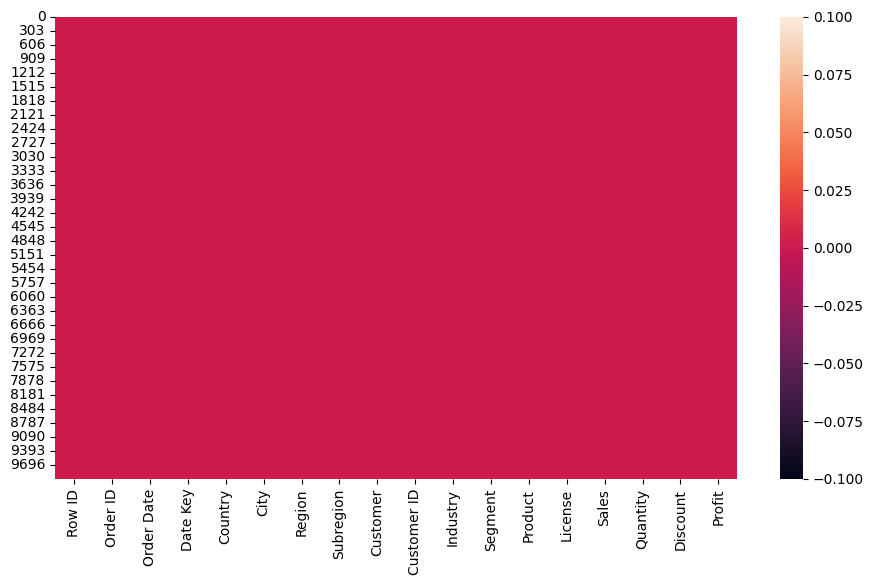

In [7]:
plt.figure(figsize = (11,6))
sns.heatmap(df[['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']].isna())

Tidak ditemukan missin value di semua kolom pada dataset SaaS Sales

### Duplicate Data
Yang akan dicek adalah kolom `License`

In [8]:
df.duplicated(subset = ['License'])

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

### Outliers

Cek outlier pada kolom `Sales`

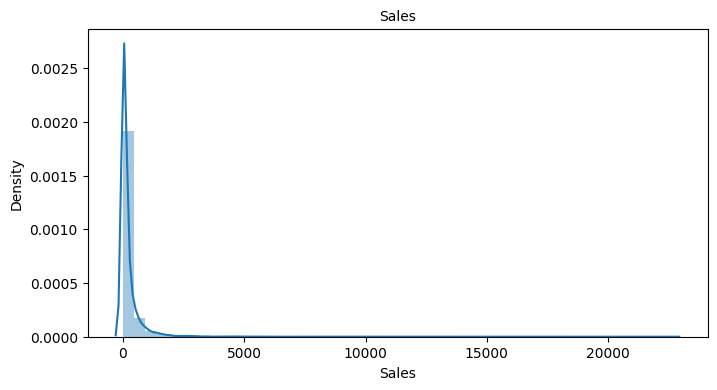

In [9]:
plt.figure(figsize = (8,4))
sns.distplot(df['Sales'])
plt.title('Sales', size = 10)
plt.show()

Cek outlier pada kolom `Profit`

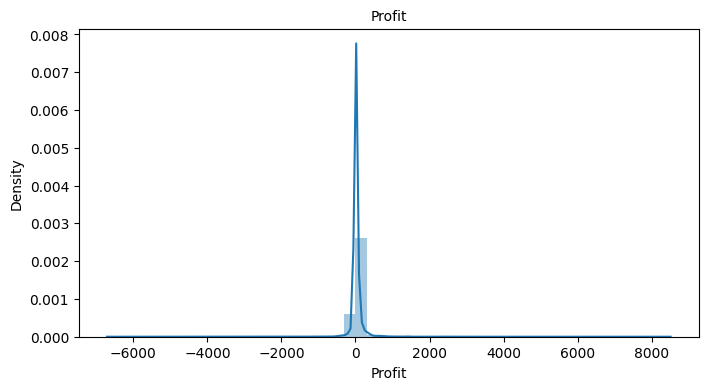

In [10]:
plt.figure(figsize = (8,4))
sns.distplot(df['Profit'])
plt.title('Profit', size = 10)
plt.show()

Mengubah tipe data yang tidak sesuai pada kolom `Order Date` dan menambah kolom `Year` untuk memudahkan melakukan grouping

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year.astype(str)

### Data Information (Cleaned)

In [12]:
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028,2020
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332,2023
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932,2023
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200,2023
9993,9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480,2023


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [14]:
pd.set_option('display.max_colwidth', 100)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'],
                     data = listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, ..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-..."
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 ..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Mo..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Aust..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, H..."


## Data Analysis

Pertama mari kita lihat performansi tahunan. Kita analisa kolom `Sales` dan `Quantity` serta `Profit` untuk menjawab:
* Apakah terjadi pertumbuhan positif?
* Apakah terjadi pertumbuhan ngeatif?
* Apakah cenderung stabil?

In [15]:
df_sum = df[['Sales', 'Quantity', 'Profit', 'Year']]
df_sum = df_sum.groupby(['Year']).sum()
df_sum

,Sales,Quantity,Profit
Year,,,
2020,484247.4981,7581,49543.9741
2021,470532.5090,7979,61618.6037
2022,608473.8300,9810,81726.9308
2023,733947.0232,12503,93507.5131


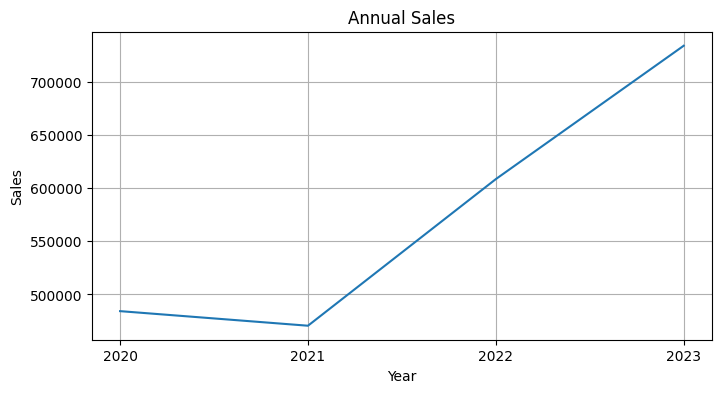

In [16]:
plt.figure(figsize = (8,4))
plt.grid(True)
sns.lineplot(data = df_sum, x = 'Year', y = 'Sales', ci = None)
plt.title('Annual Sales', size = 12)
plt.show()

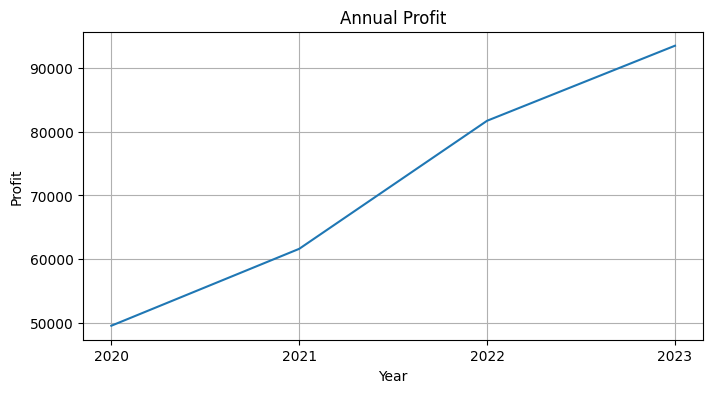

In [17]:
plt.figure(figsize = (8,4))
plt.grid(True)
sns.lineplot(data = df_sum, x = 'Year', y = 'Profit', ci = None)
plt.title('Annual Profit', size = 12)
plt.show()

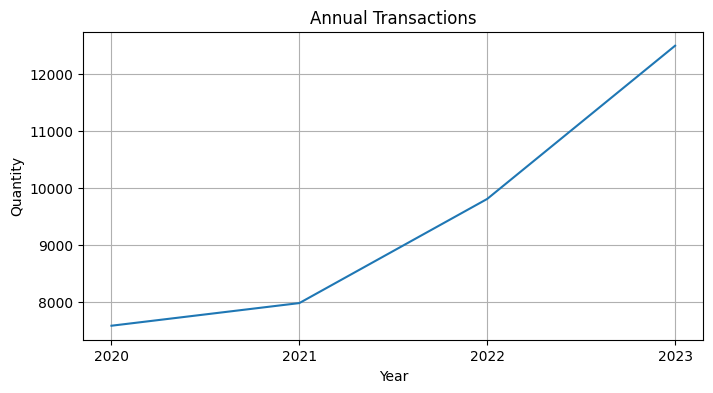

In [18]:
plt.figure(figsize = (8,4))
plt.grid(True)
sns.lineplot(data = df_sum, x = 'Year', y = 'Quantity', ci = None)
plt.title('Annual Transactions', size = 12)
plt.show()

Dari 2 figure di atas dapat disimpulkan perusahaan software dan cloud services mengalami pertumbuhan positif setiap tahunnya. **Total Sales** pada 2021 sempat turun secara YoY namun bisa tumbuh signifikan secara YoY pada 2022 dan 2023. Di sisi lain **Total Profit terus tumbuh positif setiap tahun**. Maka untuk menjaga tren positif juga selalu menjadi yang terdepan perusahaan memutuskan untuk mengalokasikan capex dan melakukan R&D pada produknya.

Berikutnya kita lihat tren dari sisi per produknya

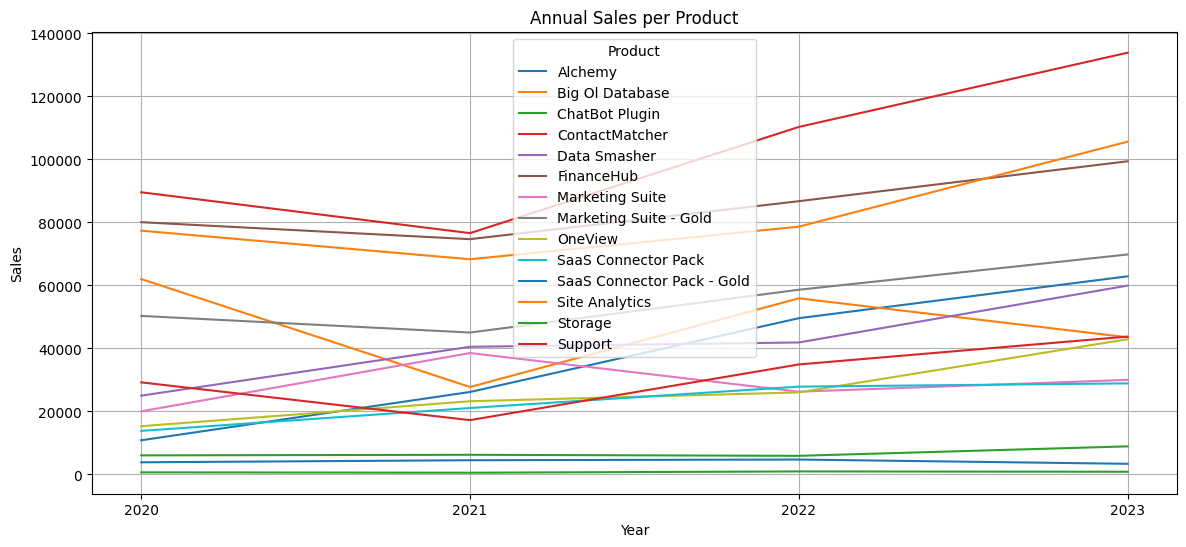

In [19]:
df['Year'] = df['Order Date'].dt.year.astype(int)

sales_pivot = df.pivot_table(values = 'Sales', index = 'Year', columns = 'Product', aggfunc = sum)

ax = sales_pivot.plot(xticks = sales_pivot.index, ylabel = 'Sales', figsize = (14,6), title = 'Annual Sales per Product', grid = True)

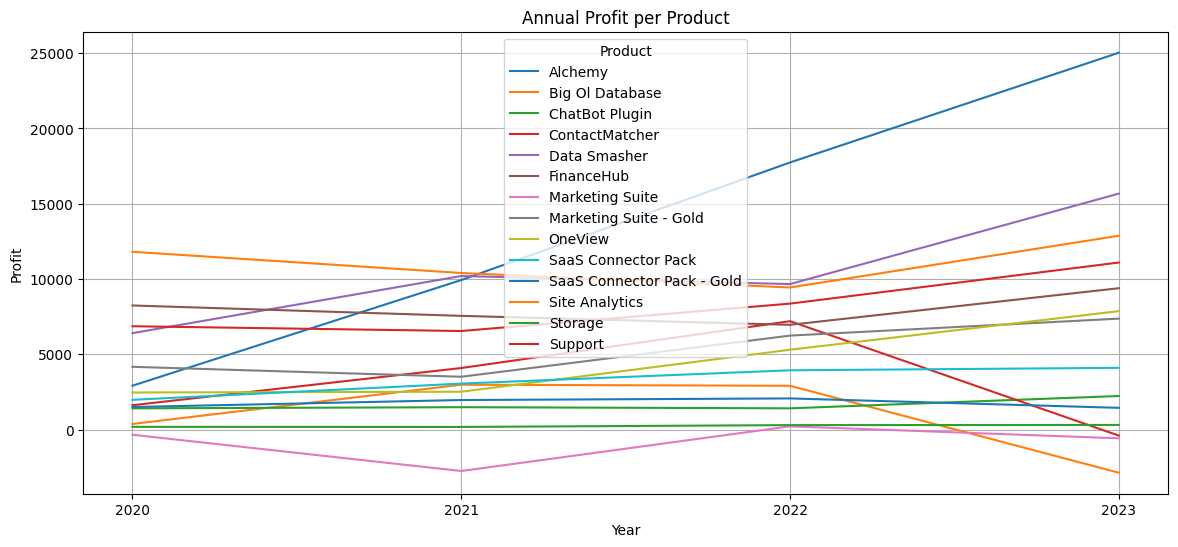

In [20]:
profit_pivot = df.pivot_table(values = 'Profit', index = 'Year', columns = 'Product', aggfunc = sum)

ax = profit_pivot.plot(xticks = profit_pivot.index, ylabel = 'Profit', figsize = (14,6), title = 'Annual Profit per Product', grid = True)

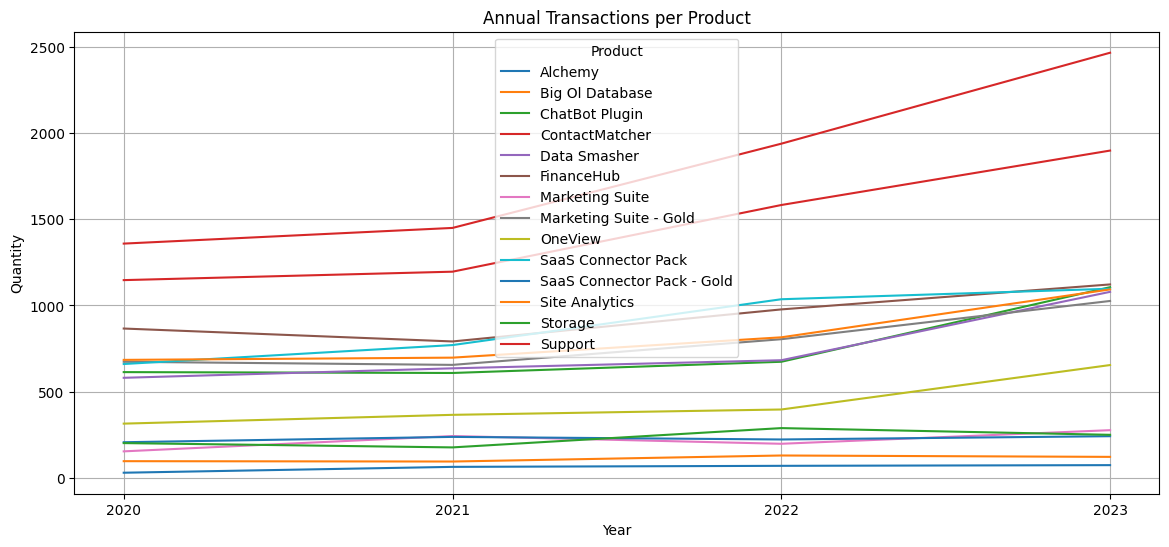

In [21]:
transactions_pivot = df.pivot_table(values = 'Quantity', index = 'Year', columns = 'Product', aggfunc = sum)

ax = transactions_pivot.plot(xticks = transactions_pivot.index, ylabel = 'Quantity', figsize = (14,6), title = 'Annual Transactions per Product', grid = True)

Secara tahunan `Sales` dan `Profit` per produk mengalami fluktuasi, ada yang tumbuh positif dan ada yang tumbuh negatif. Coba kita lihat `Sales` dan `Profit` tiap porduk secara akumulasi dari tahun 2020 hingga 2023.

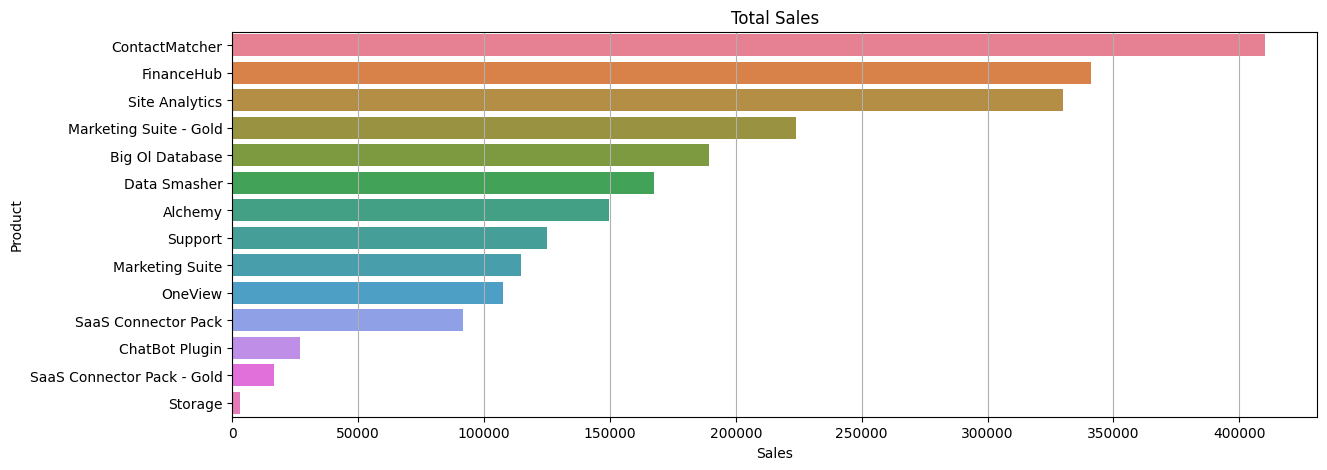

In [22]:
sales = df[['Product', 'Sales']]
sales = sales.groupby(['Product']).sum().sort_values(by = ['Sales'], ascending = False)

plt.figure(figsize = (14,5))
plt.grid(True)
sns.barplot(data = sales, x = 'Sales', y = 'Product', hue = 'Product', ci = None, estimator = sum)
plt.title('Total Sales', size = 12)
plt.show()

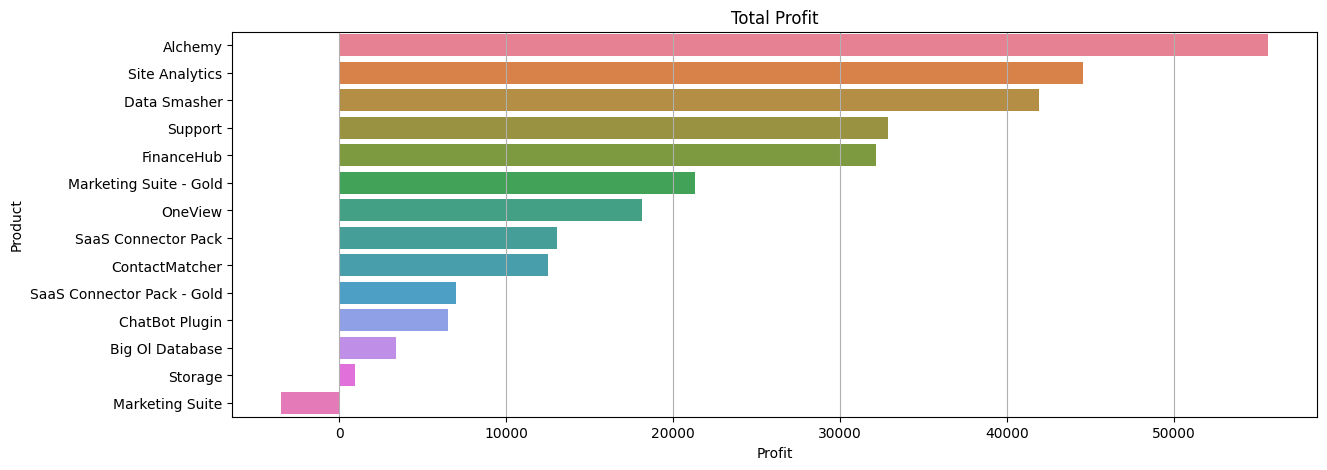

In [23]:
profit = df[['Product', 'Profit']]
profit = profit.groupby(['Product']).sum().sort_values(by = ['Profit'], ascending = False)

plt.figure(figsize = (14,5))
plt.grid(True)
sns.barplot(data = profit, x = 'Profit', y = 'Product', hue = 'Product', ci = None, estimator = sum)
plt.title('Total Profit', size = 12)
plt.show()

Ada produk yang terus tumbuh signifikan secara akumulatif tiap tahun, ada yang lambat, ada juga yang turun secara akumulatif. Dapat dilihat dari perbandingan total `Sales` dan total `Profit` tidak memiliki hubungan liniear. Sebagai contoh **ContactMatcher** mencatat sales terbanyak tapi tidak mencatat profit tertinggi. Begitu juga dengan **Marketing Suite** yang mencatat sales cukup baik tapi mencatatkan rugi.

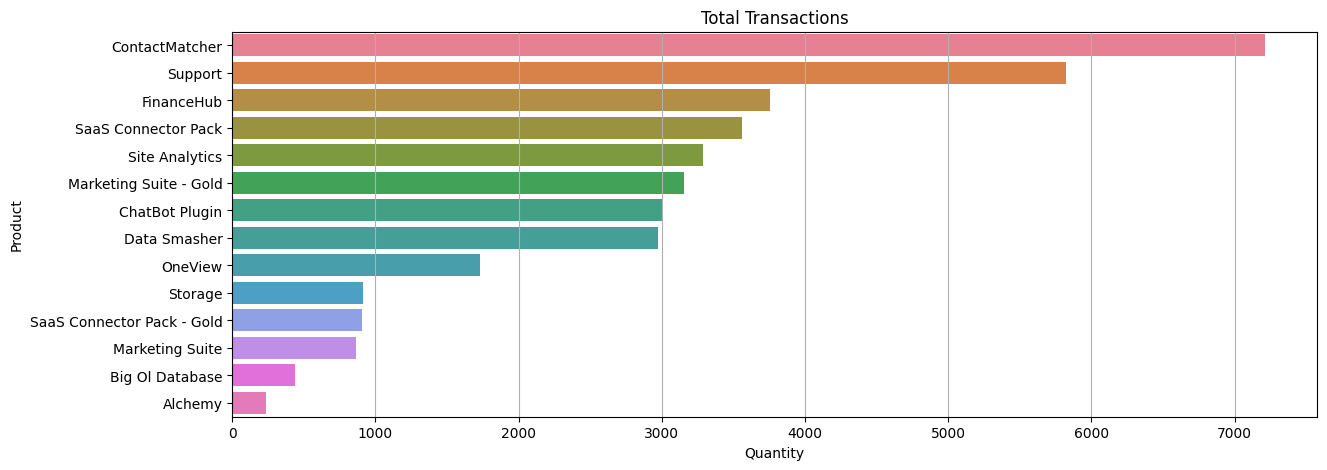

In [24]:
trx = df[['Product', 'Quantity']]
trx = trx.groupby(['Product']).sum().sort_values(by = ['Quantity'], ascending = False)

plt.figure(figsize = (14,5))
plt.grid(True)
sns.barplot(data = trx, x = 'Quantity', y = 'Product', hue = 'Product', ci = None, estimator = sum)
plt.title('Total Transactions', size = 12)
plt.show()

Selanjutnya kita hitung Cost of Goods Sold.

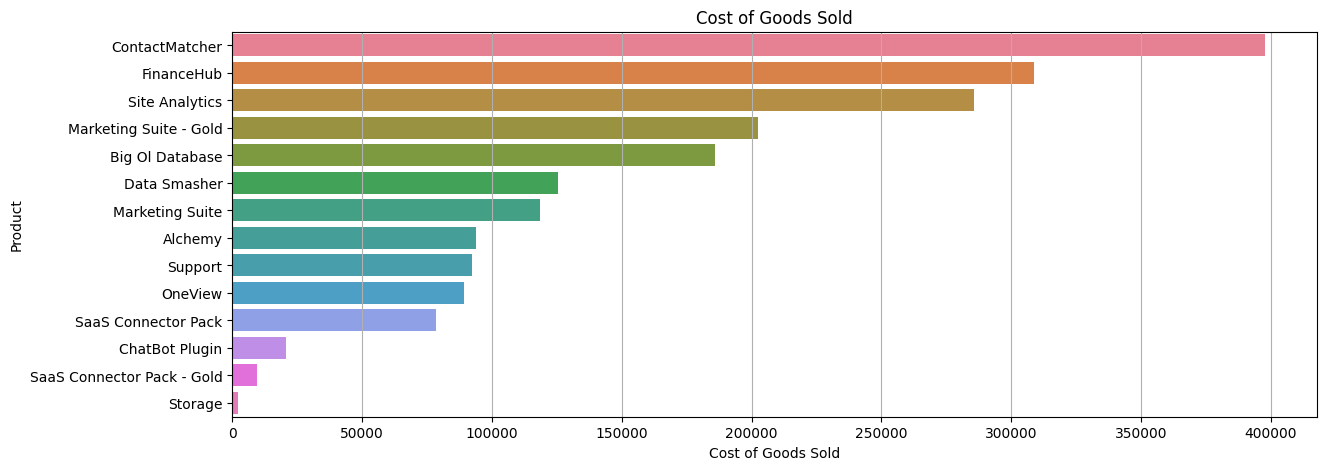

In [25]:
df['Cost of Goods Sold'] = (df['Sales'] - (df['Profit']))

cogs = df[['Product', 'Cost of Goods Sold']]
cogs = cogs.groupby(['Product']).sum().sort_values(by = ['Cost of Goods Sold'], ascending = False)

plt.figure(figsize = (14,5))
plt.grid(True)
sns.barplot(data = cogs, x = 'Cost of Goods Sold', y = 'Product', hue = 'Product', ci = None, estimator = sum)
plt.title('Cost of Goods Sold', size = 12)
plt.show()

Sebelum masuk ke bagian uji hipotesis mari kita lihat harga dari tiap software dan cloud services. Harga merupakan hal penting sebelum mengambil keputusan mengenai R&D,  karena tidak bisa dipungkiri R&D akan mempengaruhi harga dan harga akan mempengaruhi strategi penjualan.

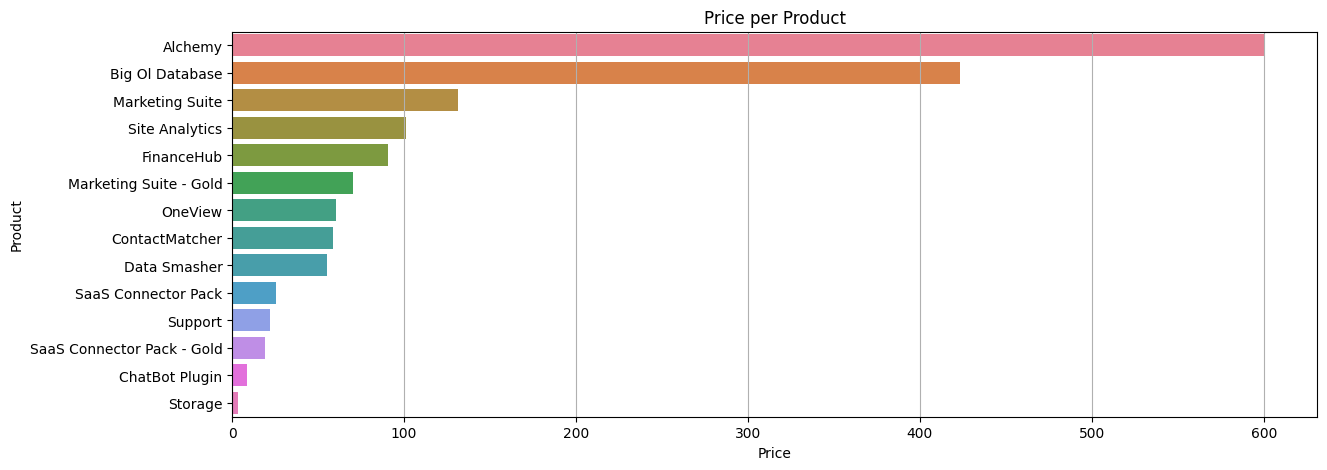

In [26]:
df['Price'] = (df['Sales'] / (df['Quantity']))

price = df[['Product', 'Price']]
price = price.groupby(['Product']).mean().sort_values(by = ['Price'], ascending = False)

plt.figure(figsize = (14,5))
plt.grid(True)
sns.barplot(data = price, x = 'Price', y = 'Product', hue = 'Product', ci = None,)
plt.title('Price per Product', size = 12)
plt.show()

## Hypothesis Test

Kita akan menguji apakah `Sales` mempengaruhi tinggi rendahnya `Profit`:

- Ho: Sales mempengaruhi tinggi-rendahnya Profit
- Ha: Sales tidak mempengaruhi tinggi-rendahnya Profit

In [27]:
statistic, p_value = stats.normaltest(df['Profit'])

if p_value < 0.05:
    print('Distribusi tidak normal, tolak Ho')
else:
    print('Distribusi normal, terima Ho')

Distribusi tidak normal, tolak Ho


In [28]:
df[['Sales', 'Profit']].corr(method = 'spearman')

,Sales,Profit
Sales,1.000000,0.518407
Profit,0.518407,1.000000


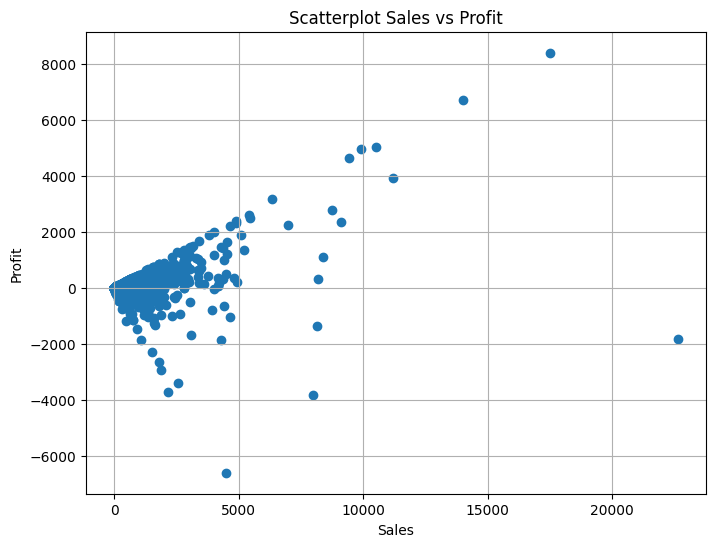

In [29]:
profit_sales = df[['Profit', 'Product', 'Sales']]
profit_sales = profit_sales.groupby(['Product']).sum().sort_values(by = ['Profit'], ascending = False)

plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(df['Sales'], df['Profit'])
plt.title('Scatterplot Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

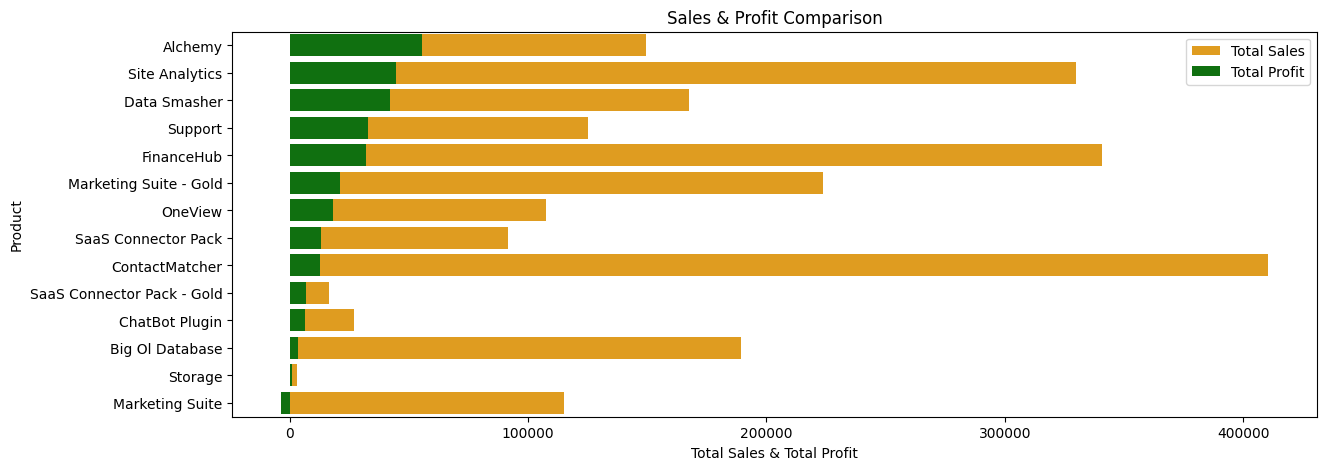

In [30]:
plt.figure(figsize=(14,5))
sns.barplot(data = profit_sales, x = 'Sales', y = 'Product', estimator = sum, color = 'orange', label = 'Total Sales')
sns.barplot(data = profit_sales, x = 'Profit', y = 'Product', estimator = sum, color = 'green', label ='Total Profit')
plt.xlabel('Total Sales & Total Profit')
plt.ylabel('Product')
plt.title('Sales & Profit Comparison', size = 12)
plt.show()

Tidak ditemukan korelasi antara total `Sales` dan total `Profit`. Seperti contoh pada **ContactMatcher** dan **Big Ol Database** mencatatkan sales yang tinggi tapi profit yang kecil. **Marketing Suite** dengan sales yang moderat justru mencatatkan rugi.

Selanjutnya kita akan menguji apakah `Discount` mempengaruhi tinggi rendahnya `Profit`:

- Ho: Discount mempengaruhi tinggi-rendahnya Profit
- Ha: Discount tidak mempengaruhi tinggi-rendahnya Profit

In [31]:
statistic, p_value = stats.normaltest(df['Discount'])

if p_value < 0.05:
    print('Distribusi tidak normal, tolak Ho')
else:
    print('Distribusi normal, terima Ho')

Distribusi tidak normal, tolak Ho


In [32]:
df[['Discount', 'Profit']].corr(method = 'spearman')

,Discount,Profit
Discount,1.00000,-0.54335
Profit,-0.54335,1.00000


In [33]:
profit_sales_discount = df[['Profit', 'Discount', 'Product']]
profit_sales_discount = profit_sales_discount.groupby(['Product']).sum().sort_values(by = ['Discount'], ascending = False)
profit_sales_discount

,Profit,Discount
Product,,
ContactMatcher,12496.2822,650.35
Site Analytics,44515.7306,137.40
SaaS Connector Pack,13059.1436,132.40
FinanceHub,32136.4203,130.00
Support,32864.4698,117.20
OneView,18138.0054,77.60
Marketing Suite - Gold,21278.8264,63.20
Data Smasher,41936.6357,60.80
ChatBot Plugin,6527.7870,59.60


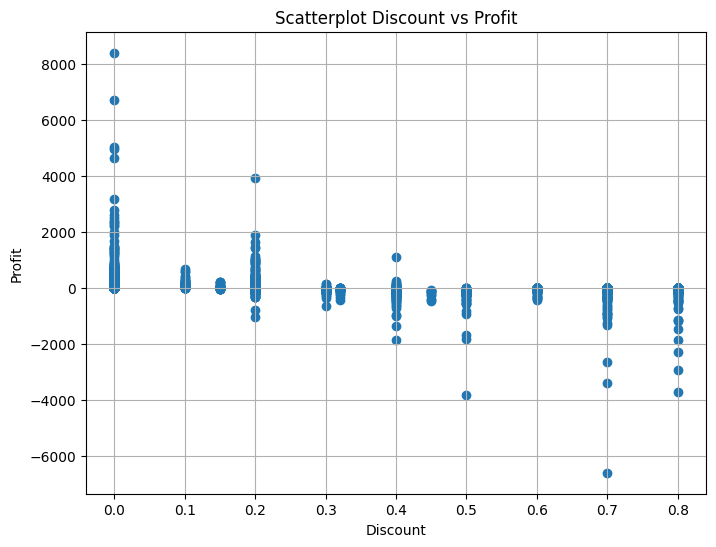

In [34]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(df['Discount'], df['Profit'])
plt.title('Scatterplot Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

Tidak terdapat bukti korelasi antara total `Discount` dan total `Profit`. Kita ambil contoh pada **SaaS Connector Pack** dan **FinanceHub** dengan total discount hampir sama tapi mencatatkan profit yang berbeda jauh.

Selanjutnya kita akan menguji apakah tipe `Cost of Goods Sold` mempengaruhi tinggi-rendahnya `Profit`:

- Ho: Cost of Goods Sold yang tinggi menyebabkan turunnya Profit
- Ha: Cost of Goods Sold yang tinggi tidak menyebabkan turunnya Profit

In [35]:
statistic, p_value = stats.normaltest(df['Cost of Goods Sold'])

if p_value < 0.05:
    print('Distribusi tidak normal, tolak Ho')
else:
    print('Distribusi normal, terima Ho')

Distribusi tidak normal, tolak Ho


In [36]:
df[['Cost of Goods Sold', 'Profit']].corr(method = 'spearman')

,Cost of Goods Sold,Profit
Cost of Goods Sold,1.000000,0.382543
Profit,0.382543,1.000000


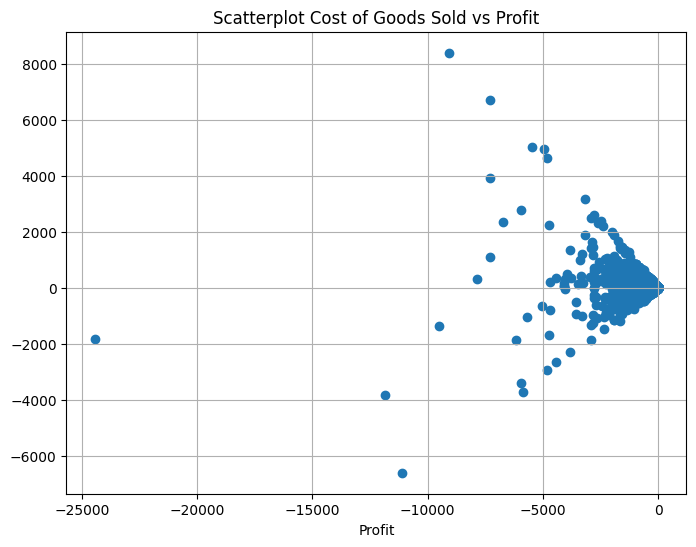

In [37]:
df['Cost of Goods Sold'] = (df['Sales'] - (df['Profit'])) * (-1)

profit_cogs = df[['Profit', 'Product', 'Cost of Goods Sold']]
profit_cogs = profit_cogs.groupby(['Product']).sum().sort_values(by = ['Profit'], ascending = False)

plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(df['Cost of Goods Sold'], df['Profit'])
plt.title('Scatterplot Cost of Goods Sold vs Profit')
plt.xlabel('Cost of Goods Sold')
plt.xlabel('Profit')
plt.show()

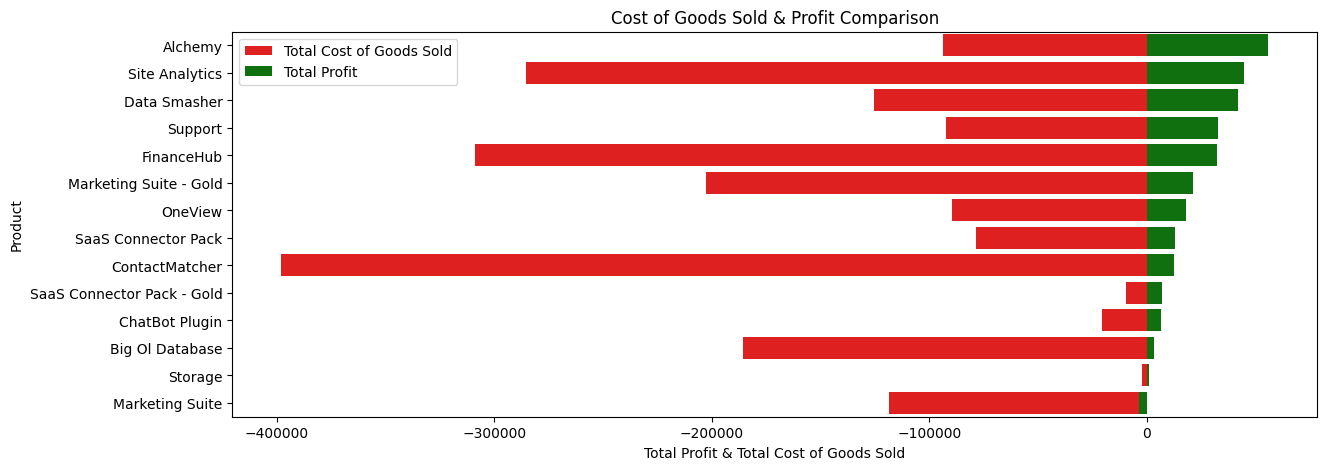

In [38]:
# Cost of Goods Sold dibuat negatif agar mudah membandingkan antara cost dan profit
plt.figure(figsize=(14,5))
sns.barplot(data = profit_cogs, x = 'Cost of Goods Sold', y = 'Product', estimator = sum, color = 'red', label = 'Total Cost of Goods Sold')
sns.barplot(data = profit_cogs, x = 'Profit', y = 'Product', estimator = sum, color = 'green', label ='Total Profit')
plt.xlabel('Total Profit & Total Cost of Goods Sold')
plt.ylabel('Product')
plt.title('Cost of Goods Sold & Profit Comparison', size = 12)
plt.show()

Tidak terdapat korelasi antara total `Cost of Goods Sold` dan total `Profit`. Kita ambil contoh pada **Site Analytics** dan **Support** yang memiliki GAP Cost of Goods Sold tapi mencatatkan profit yang hampir sama.

Selanjutnya kita akan menguji apakah tipe `Industry` mempengaruhi tinggi-rendahnya `Profit`:

- Ho: Sales dari 4 industri terbesar mempengaruhi Profit
- Ha: Sales dari 4 industri terbesar tidak mempengaruhi Profit

In [39]:
df_industry = df[['Industry', 'Sales', 'Profit']]
df_industry = df_industry.groupby(['Industry']).sum().sort_values(by = ['Profit'], ascending = False)
df_industry

,Sales,Profit
Industry,,
Finance,474150.4844,50348.9696
Energy,304644.1409,45282.3137
Manufacturing,295192.3812,38413.1064
Consumer Products,224044.1422,37018.0077
Healthcare,273183.2882,31969.0932
Retail,223072.0720,30207.8208
Tech,263169.0277,24615.0436
Communications,120962.2365,13976.3410
Transportation,90191.3276,7402.6967


In [40]:
statistic, p_value = f_oneway(
    df[df['Industry'] == 'Finance' ]['Sales'][df['Profit'] > 28],
    df[df['Industry'] == 'Energy' ]['Sales'][df['Profit'] > 28],
    df[df['Industry'] == 'Manufacturing' ]['Sales'][df['Profit'] > 28],
    df[df['Industry'] == 'Healthcare' ]['Sales'][df['Profit'] > 28])

print('Statistic:', statistic)
print('P-Value:', p_value)

if p_value/2 < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Statistic: 0.5233485694718741
P-Value: 0.6662679422473347
Terima H0


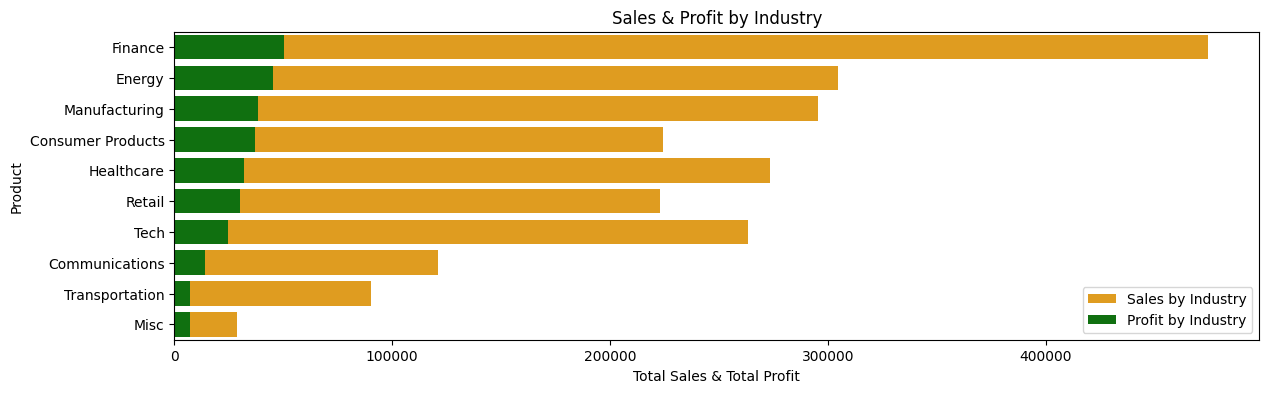

In [41]:
plt.figure(figsize=(14,4))
sns.barplot(data = df_industry, x = 'Sales', y = 'Industry', estimator = sum, color = 'orange', label = 'Sales by Industry')
sns.barplot(data = df_industry, x = 'Profit', y = 'Industry', estimator = sum, color = 'green', label = 'Profit by Industry')
plt.xlabel('Total Sales & Total Profit')
plt.ylabel('Product')
plt.title('Sales & Profit by Industry', size = 12)
plt.show()

Dari figure ini terlihat 4 tipe industri terbesar memang punya kontribusi Profit yang tinggi dibanding tipe industri lainnya. Di Keempat tipe industri akan jadi fokus pemasaran dan pengembangan produk.

In [42]:
industry_product_profit = df[['Industry', 'Product', 'Profit']]
industry_product_profit = industry_product_profit.groupby(['Industry', 'Product']).sum().sort_values(by = ['Profit'], ascending = False)
industry_product_profit.head(20)

Profit
Industry          Product                           
Consumer Products Alchemy                 17680.9013
Finance           Alchemy                 10181.8673
Energy            ContactMatcher           9525.2607
Finance           Site Analytics           8549.7565
Energy            Site Analytics           8251.0431
Finance           FinanceHub               7801.7706
                  Support                  7702.7251
                  Data Smasher             7535.7010
Retail            Alchemy                  7158.9447
Energy            Big Ol Database          7024.9064
Retail            Site Analytics           6154.8749
Tech              Site Analytics           5810.7933
Finance           Marketing Suite - Gold   5810.1607
Energy            Data Smasher             5472.7392
Retail            Data Smasher             5418.5954
Manufacturing     Support                  5324.0902
Healthcare        Alchemy                  5183.4037
                  Data Smasher             4941.1278
Finance           OneView                  4805.3794
Manufacturing     Alchemy                  4781.9047

## Summary

**Performansi bisnis:**
- Overall total `Sales` mengalami pertumbuhan positif setiap tahun dari 2020-2023, walaupun pada 2021 sempat tumbuh negatif tapi pada 2022 dan 2023 bisa rebound dan tumbuh secara YoY selama 2 tahun berturut-turut
- Overall total `Profit` mengalami pertumbuhan positif setiap tahun dari 2020-2023
- Pertumbuhan `Profit` dalam 2 tahun terakhir memberi ruang pada capex 2024 untuk melakukan R&D 

**Hasil Uji Hipotesis:**
- Tidak terdapat korelasi antara total `Sales` dan total `Profit`
- Tidak erdapat korelasi antara total `Discount` dan total `Profit`
- Tidak terdapat korelasi antara total `Cost of Goods Sold` dan total `Profit`
- Terdapat korelasi antara top 4 `Industry` dengan total `Profit`. Top 4 `Industry` tersebut adalah: **Finance**, **Energy**, **Manufacturing**, dan **Healthcare**

**Data dan Analisa:**
- Top 5 total Sales tertinggi: *ContactMatcher*, *FinanceHub*, *Site Analytics*, *Marketing Suite - Gold*, *Big Ol Database*
- Top 5 total transaksi tertinggi: *ContactMatcher*, *Support*, *FinanceHub*, *SaaS Connector Pack*, *Site Analytics*
- Top 5 total profit: *Alchemy*, *Site Analytics*, *Data Smasher*, *FinanceHub*, *Marketing Suite - Gold*
- Top 5 total biaya : *ContactMatcher*, *FinanceHub*, *Site Analytics*, *Marketing Suite - Gold*, *Big Ol Database*
- Top 5 produk termahal: *Alchemy*, *Big Ol Database*, *Marketing Suite*, *Site Analytics*, dan *FinanceHub*

## Recommendation

Dalam menentukan produk software dan cloud services yang akan dilakukan R&D tahun depan perusahaan perlu memperhatikan hal-hal berikut:
- Pilih produk yang total profitnya tinggi
- Pilih produk yang banyak digunakan di top 4 industri seperti **Alchemy**, **Site Analytics**, **FinanceHub**, **Support**, dan **Data Smasher**
- Cost of goods sold perlu diperhatikan

Dengan mengerucutnya pilihan produk software dan cloud services diharapkan mampu meningkatkan profit perusahaan di masa depan.